# Correlations and Covariance 

* Author: Johannes Maucher, some modifications by OK in 2019
* Last Update: 2017-09-26    
* Topics of this notebook
    * Calculation of significant correlations


In [1]:

#load tidyverse
library(tidyverse)
library(corrplot) #Scatterplots

#Resize graphics
options(repr.plot.res = 80, repr.plot.height=6, repr.plot.width=7)  #Defaults:resolution=120,width/height=7


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
corrplot 0.84 loaded


In [2]:
#We use our previous Facebook data
facebookData <- read.csv(file="../data/facebook-ad-campaign.csv", header=TRUE,
                         sep=",", dec=".")

#Some cleaning
facebookData <- facebookData %>% 
                    drop_na() %>% 
                    select(-X) %>% 
                    filter(spent < 100, spent > 0, total_conversion < 10)


In [3]:
glimpse(facebookData)

Observations: 505
Variables: 15
$ ad_id               <int> 708746, 708749, 708815, 708818, 708889, 708895,...
$ reporting_start     <fct> 17/08/2017, 17/08/2017, 30/08/2017, 17/08/2017,...
$ reporting_end       <fct> 17/08/2017, 17/08/2017, 30/08/2017, 17/08/2017,...
$ campaign_id         <int> 916, 916, 916, 916, 916, 916, 916, 916, 916, 91...
$ fb_campaign_id      <int> 103916, 103917, 103928, 103928, 103940, 103941,...
$ age                 <fct> 30-34, 30-34, 30-34, 30-34, 30-34, 30-34, 30-34...
$ gender              <fct> M, M, M, M, M, M, M, M, M, M, M, M, M, M, M, M,...
$ interest1           <int> 15, 16, 28, 28, 15, 16, 27, 28, 20, 30, 15, 16,...
$ interest2           <int> 17, 19, 32, 33, 16, 20, 31, 32, 26, 34, 16, 20,...
$ interest3           <int> 17, 21, 32, 32, 17, 18, 31, 31, 23, 31, 17, 22,...
$ impressions         <int> 7350, 17861, 4259, 4133, 15615, 10951, 2355, 95...
$ clicks              <int> 1, 2, 1, 1, 3, 1, 1, 3, 7, 1, 1, 4, 2, 2, 2, 2,...
$ spent             

In [4]:
factor_cols <- c("gender", "age")
numeric_cols <- c("clicks", "spent", "impressions","total_conversion")

## Correlation

Variance measures the variation of a single random variable, e.g. the 'spent' for an ad in a marketing campaign. First take look at formula of the **variance** of a $x_j$-variable in column $j$:

$$Var(x_j) = s_j^2 = \frac {1} {N-1}  \sum\limits_{i=1}^N (x_{ij} - \bar{x_j})^2 $$

$N$ ist the number of observations in the sample, $\bar{x_j}$ is the mean of the $x_j$-variable of the sample. 


The `cor()`-function can be applied to determine the relationship between quantitative variables. There exists different methods for calculating a correlation-measure. For example the `pearson`-correlation-coefficient measures the degree of linear relationship between two variables. Other correlation-methods, which can be assigned to the `method`-argument of the `cor()`-function are `spearman` and `kendall`. 

`Keep in mind`: If data come from a normal-distributed population the *pearson*-correlation-coefficient should be calculated, otherwise one of the other two methods is recommended. 


The formula for the pearson-correlation-coefficient is:

$$ Cor(x_j, x_k) = r_{jk} = \frac { \sum\limits_{i=1}^N (x_{ij} - \bar{x}_j) (x_{ik} - \bar{x}_k) } 
{\sqrt{ \sum\limits_{i=1}^N (x_{ij} - \bar{x}_j)^2 \sum\limits_{i=1}^N (x_{ik} - \bar{x}_k)^2 }} $$

$r_{jk}$ the correlation coefficient of the variables $x_j$ and $x_k$. $N$ ist the number of observations in the sample, $\bar{x}_j$ is the mean of the $x_j$-variable of the sample and $\bar{x}_k$ is the mean of the $x_k$-variable of the sample. 


We can write:

$$ X_{sd} = C X D^{-1} \quad \rightarrow \quad R = \frac {1} {N-1} X^T_{sd}   X_{sd}$$ 

With $C$ as centering matrix (calculation below) and $D = diag(sd_1, ..., sd_K)$ as diagonal matrix with the standard deviations. K is the number of input variables or here columns. Look at the calculation by hand below.


### [`cor()`](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/cor)-function

Correlations between the numeric variables of the *facebookData*-dataset:

In [5]:
cat("\n------- cor() by hand:\n")
X <- as.matrix(facebookData[, c(numeric_cols)])
n <- nrow(X)

I <- diag(n)                #Identity matrix
C <- I - matrix(1/n, n, n)  #Centering matrix
D <- diag(apply(X, 2, sd))  #Diagonal matrix with standard deviations

Xsd <- C %*% X %*% solve(D)

R <- t(Xsd) %*% Xsd / (n-1)
R



------- cor() by hand:


1.0000000,0.9920675,0.9263694,0.5458242
0.9920675,1.0000000,0.9532241,0.5640604
0.9263694,0.9532241,1.0000000,0.6395284
0.5458242,0.5640604,0.6395284,1.0000000


In [6]:
cat("\n------- cor():\n")
cor(facebookData[, c(numeric_cols)], method="pearson")


------- cor():


,clicks,spent,impressions,total_conversion
clicks,1.0000000,0.9920675,0.9263694,0.5458242
spent,0.9920675,1.0000000,0.9532241,0.5640604
impressions,0.9263694,0.9532241,1.0000000,0.6395284
total_conversion,0.5458242,0.5640604,0.6395284,1.0000000


In [7]:
cor(facebookData[, c(numeric_cols)], method="spearman")

,clicks,spent,impressions,total_conversion
clicks,1.0000000,0.9876631,0.9274855,0.4780726
spent,0.9876631,1.0000000,0.9354407,0.4754234
impressions,0.9274855,0.9354407,1.0000000,0.5160173
total_conversion,0.4780726,0.4754234,0.5160173,1.0000000


## Covariance

Covariance measures how much two random variables vary together (like the 'spent' for an ad in a marketing campaign and the resulting 'total_conversion' in this marketing campaign). The entries $r_{j,k}$ of the pearson-correlation matrix, which is returned by the `cor()`-function with `method='pearson'`, can be calculated from the entries $\sigma_{j,k}$ of the **covariance matrix** (returned by `cov()`) as follows:

$$ r_{j,k} = \frac{s_{j,k}}{s_{j}\cdot s_{k}} $$ 

where $s_{j}$ and $s_{k}$ are the standard-deviations of columns $j$ and $k$, respectively. This relation is proven for a pair of columns $j$, $k$ of the data in the code snippet below. 


The covariance matrix is also called **variance-covariance matrix** because variances are along the diagonal and covariances are in the off-diagonal elements.

The behavior of a variable is described by the variation. Covariation describes the behavior between variables and their relationship. 


The formula for the covariance-coefficient is: 

$$ Cov(x_j, x_k) = s_{jk}^2 = \frac {1} {N-1}  \sum\limits_{i=1}^N (x_{ij} - \bar{x_j}) (x_{ik} - \bar{x_k}) $$

$s_{jk}^2$ is the covariance coefficient of the variables $x_j$ and $x_k$. $N$ ist the number of observations in the sample, $\bar{x_j}$ is the mean of the $x_j$-variable of the sample and $\bar{x_k}$ is the mean of the $x_k$-variable of the sample. If $j=k$ than $s_{jk}^2$ is the variance. 

We can write:

$$ S = \frac {1} {N-1} X_c^T \cdot X_c $$ 

$X_c = X - 1_N \bar{x}^T = CX$, where $C$ is the centering matrix (calculation below). K is the number of input variables or here columns. Look at the calculation by hand below.


### [`cov()`](https://www.rdocumentation.org/packages/pbdDMAT/versions/0.5-1/topics/covariance)-function

In [8]:
cat("\n------- cov() by hand:\n")
X <- as.matrix(facebookData[, c(numeric_cols)])
n <- nrow(X)
C <- diag(n) - matrix(1/n, n, n)

Xc <- C %*% X

S <- (t(Xc) %*% Xc) /(n-1)  
S



------- cov() by hand:


,clicks,spent,impressions,total_conversion
clicks,1.989027e+02,3.299848e+02,1.235094e+06,9.296102
spent,3.299848e+02,5.562431e+02,2.125313e+06,16.065187
impressions,1.235094e+06,2.125313e+06,8.936989e+09,73010.159064
total_conversion,9.296102e+00,1.606519e+01,7.301016e+04,1.458329


In [9]:

cat("\n------- cov():\n")
cov(facebookData[, c(numeric_cols)])



------- cov():


,clicks,spent,impressions,total_conversion
clicks,1.989027e+02,3.299848e+02,1.235094e+06,9.296102
spent,3.299848e+02,5.562431e+02,2.125313e+06,16.065187
impressions,1.235094e+06,2.125313e+06,8.936989e+09,73010.159064
total_conversion,9.296102e+00,1.606519e+01,7.301016e+04,1.458329


In [10]:
facebookData.tmp <- facebookData[, c(numeric_cols)]

j <- 2  #spent
k <- 4  #total_conversion
sj <- sd(facebookData.tmp[, j])
sk <- sd(facebookData.tmp[, k])

cov(facebookData.tmp)[j, k]/(sj*sk)

#Compare that value with the pearson-cor-matrix below 

cor(facebookData[numeric_cols], method="pearson")

[1] 0.5640604

,clicks,spent,impressions,total_conversion
clicks,1.0000000,0.9920675,0.9263694,0.5458242
spent,0.9920675,1.0000000,0.9532241,0.5640604
impressions,0.9263694,0.9532241,1.0000000,0.6395284
total_conversion,0.5458242,0.5640604,0.6395284,1.0000000


In the examples above the `cor()`-function calculates a square-matrix, which contains the correlation-coefficients of all pairs of variables. However, it is also possible to explicitely define between which variables the correlations shall be calculated:

In [11]:
cor(facebookData[c("clicks", "spent")], 
    facebookData[c("impressions", "total_conversion")])

,impressions,total_conversion
clicks,0.9263694,0.5458242
spent,0.9532241,0.5640604


### Significance of Correlations
Calculating just a correlation coefficient, such as the `cor()`-function can be insufficient. The samples, based on which the correlation has been calculated, may be too small. Moreover, it can be difficult to interpret the correlation values: Which magnitude actually indicates a correlation? R's [`cor.test()`](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/cor.test)-function can be applied to find statistically significant correlations.

`Remember` what statistically significance means.

In [12]:
facebookData.tmp <- facebookData[, c(numeric_cols)]

#2=column of spent and 4=column of total_conversion
(r <- cor(facebookData.tmp[, 4], facebookData.tmp[, 2]))

cor.test(facebookData.tmp[, 4], facebookData.tmp[, 2])

[1] 0.5640604


	Pearson's product-moment correlation

data:  facebookData.tmp[, 4] and facebookData.tmp[, 2]
t = 15.32, df = 503, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5014872 0.6207633
sample estimates:
      cor 
0.5640604 


The report, generated by the `cor.test()`-function contains:

* the correlation-coefficient $r$, calculated from the sample. This is the same value as returned by *cor()*
* The t-value for the null-hypothesis: $$t=\frac{r}{\sqrt{\frac{1-r^2}{N-2}}}.$$ The null-hypothesis states that the true correlation of the population is 0 and the results are by chance. The t-value for the null-hypothesis is assumed to be distributed according to a t-distribution with $N-2$ degrees of freedom, where $N$ is the number of elements in the sample.
* The p-value for the null-hypothesis. If this value is larger than a given confidence-threshold (e.g. 0.05), the null-hypothesis can NOT be rejected: in this case NO statistically significant correlation can be derived from the sample.

These values, calculated by `cor.test()`, can also be calculated as follows:

In [13]:
N <- nrow(facebookData.tmp) #N is the sample-size
cat("Sample size N:", N, "\n")
cat("Correlation-coefficient r:", r, "\n") #Results from 'cor.test()'

#Calculate the t-value for the given sample 
#from the sample's correlation-coefficient r
t <- r/(sqrt((1-r**2)/(N-2)))
cat("t-value:", t, "\n")

#Probability of the null-hypothesis, calculated 
#from the corresponding t-distribution
pval <- 2*(1 - pt(t, df=N-2)) 
cat("Probability of the null-hypothesis:", pval, "\n")

Sample size N: 505 
Correlation-coefficient r: 0.5640604 
t-value: 15.32039 
Probability of the null-hypothesis: 0 


#### Significant correlations
In real world applications the entire population is typically unknown. Therefore samples of limited size are drawn from this population and one tries to estimate the real statistics of the population from the statistics of the sample. The goal of significance-tests is to assess the quality of the sample-based estimation.


### Visualization of Correlations

R's function [`pairs()`](https://www.rdocumentation.org/packages/graphics/versions/3.6.1/topics/pairs) plots a matrix of 2-dimensional correlations between columns of the given dataframe. We use argument 'lower.panel = panel.smooth' to calculate a smooth regression line into the lower diagonal of the plot.

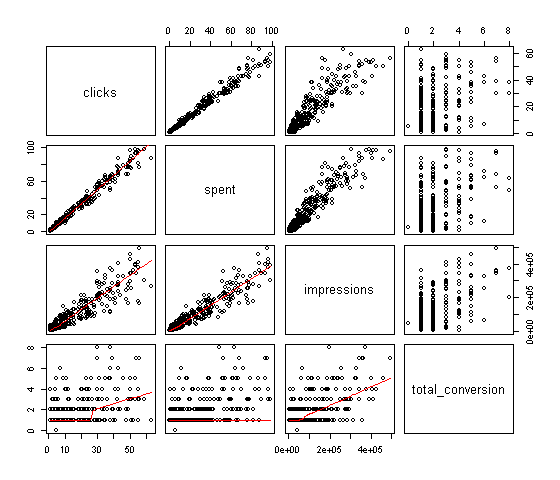

In [14]:
#Plot features we are interested in
pairs(facebookData[, c(numeric_cols)], 
      lower.panel = panel.smooth)

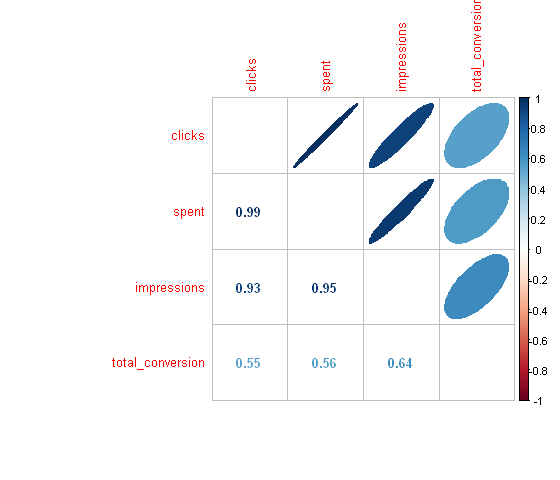

In [15]:
#library(corrplot) #Scatterplots

#Here: input variables and output variable
corrplot.mixed(corr=cor(facebookData[, c(numeric_cols)], 
                        use="complete.obs"), 
                        upper="ellipse", tl.pos="lt")